In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico de límites.
using Plots  # Para el dibujo de gráficas.
#plotlyjs() # Para obtener gráficos interactivos.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.

In [3]:
N = 50
a(n) = 1/2^n
an = [a(n) for n = 1:N]
An = cumsum(an)

50-element Vector{Float64}:
 0.5
 0.75
 0.875
 0.9375
 0.96875
 0.984375
 0.9921875
 0.99609375
 0.998046875
 0.9990234375
 0.99951171875
 0.999755859375
 0.9998779296875
 ⋮
 0.999999999998181
 0.9999999999990905
 0.9999999999995453
 0.9999999999997726
 0.9999999999998863
 0.9999999999999432
 0.9999999999999716
 0.9999999999999858
 0.9999999999999929
 0.9999999999999964
 0.9999999999999982
 0.9999999999999991

In [4]:
N = 50
a(n) = 1/2^n
A(n) = sum(a, 1:n)
An = [A(n) for n = 1:N]

50-element Vector{Float64}:
 0.5
 0.75
 0.875
 0.9375
 0.96875
 0.984375
 0.9921875
 0.99609375
 0.998046875
 0.9990234375
 0.99951171875
 0.999755859375
 0.9998779296875
 ⋮
 0.999999999998181
 0.9999999999990905
 0.9999999999995453
 0.9999999999997726
 0.9999999999998863
 0.9999999999999432
 0.9999999999999716
 0.9999999999999858
 0.9999999999999929
 0.9999999999999964
 0.9999999999999982
 0.9999999999999991

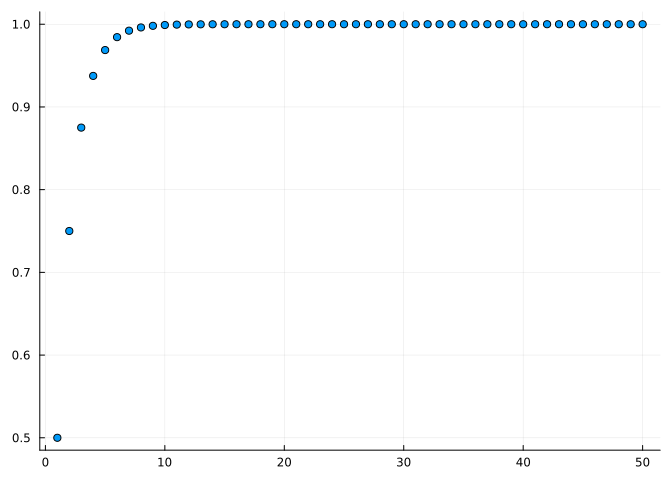

In [5]:
using Plots, LaTeXStrings
scatter(An, legend=false)

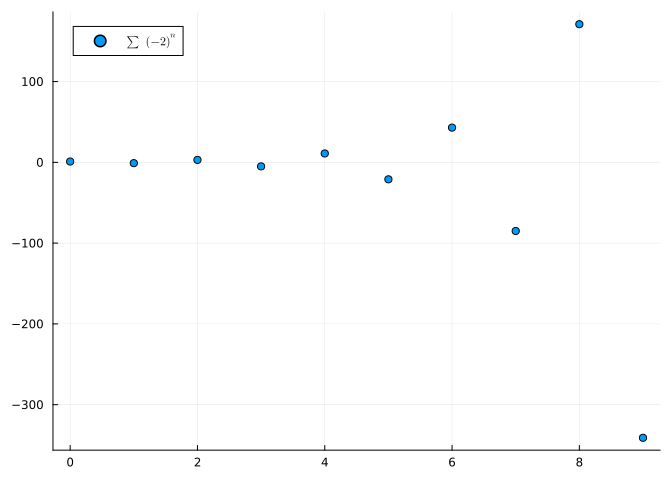

In [6]:
using Plots, LaTeXStrings
an = [(-2)^n for n = 0:9]
scatter(0:9, cumsum(an), label=L"$\sum (-2)^n$")

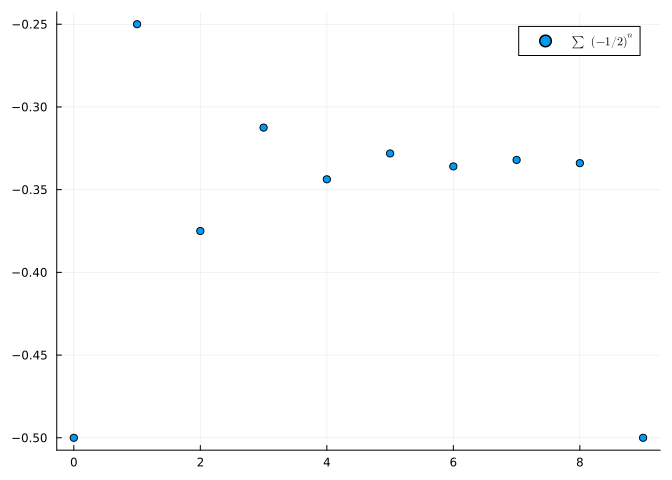

In [7]:
bn = [(-1/2)^n for n = 1:9]
scatter(0:9, cumsum(bn), label=L"$\sum (-1/2)^n$")

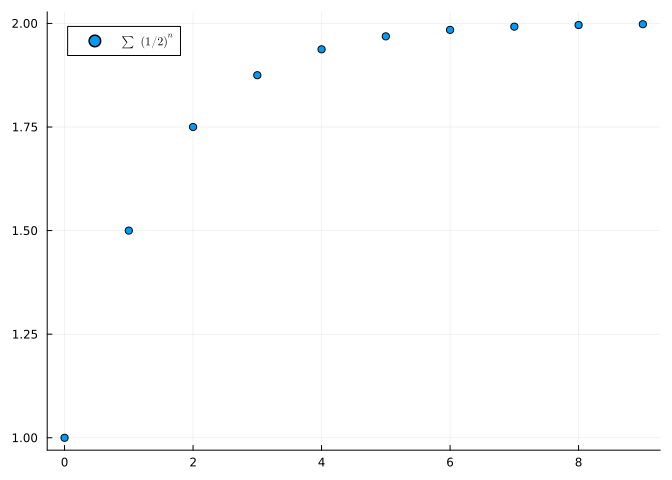

In [8]:
cn = [(1/2)^n for n = 0:9]
scatter(0:9, cumsum(cn), label=L"$\sum (1/2)^n$")

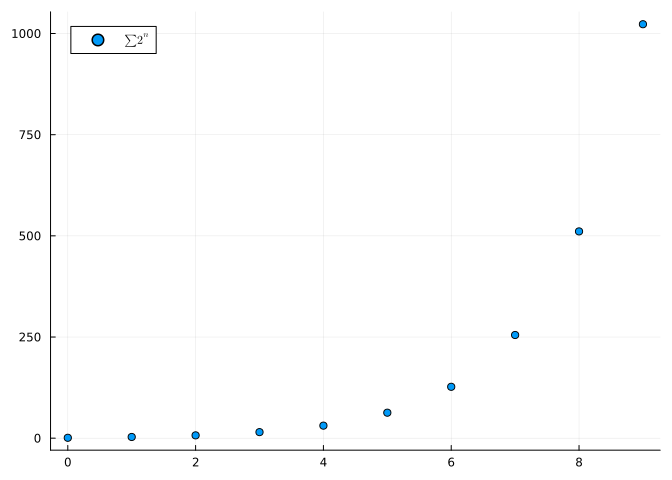

In [9]:
dn = [2^n for n = 0:9]
scatter(0:9, cumsum(dn), label=L"$\sum 2^n$")

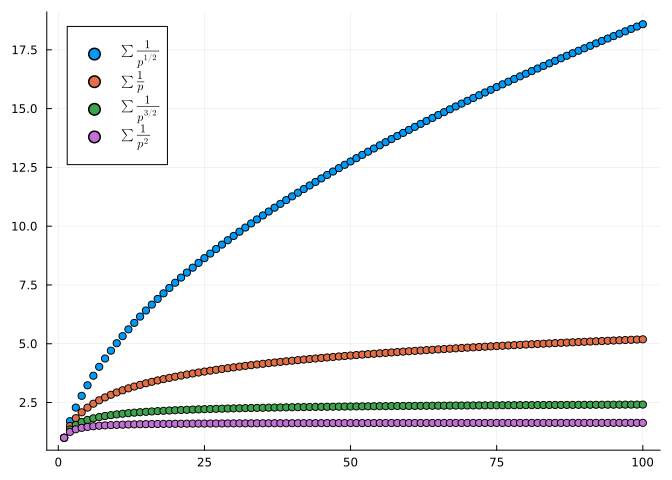

In [10]:
using Plots, LaTeXStrings
a(n,p) = 1/n^p
an = [a(n,1/2) for n = 1:100]
scatter(cumsum(an), label=L"$\sum \frac{1}{p^{1/2}}$", legend=:topleft)
bn = [a(n,1) for n = 1:100]
scatter!(cumsum(bn), label=L"$\sum \frac{1}{p}$")
cn = [a(n,3/2) for n = 1:100]
scatter!(cumsum(cn), label=L"$\sum \frac{1}{p^{3/2}}$")
dn = [a(n,2) for n = 1:100]
scatter!(cumsum(dn), label=L"$\sum \frac{1}{p^2}$")

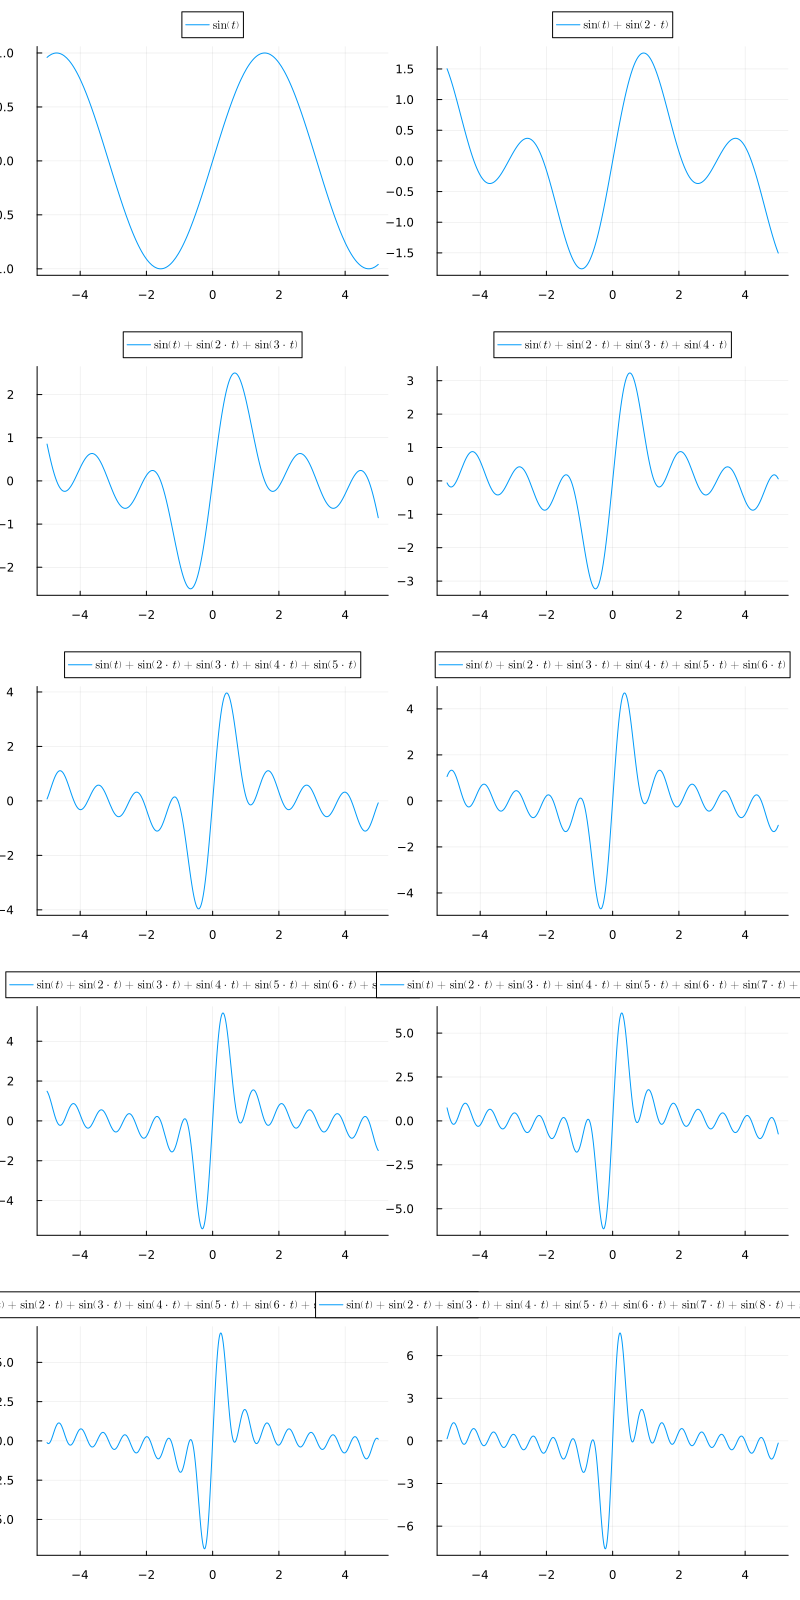

In [11]:
using Plots, SymPy, Latexify
@vars t real=true
a(t,n) = sin(n*t)
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, plot(i, label=latexify(i), legend=:outertop))
end
plot(plots..., layout=(5,2), size=(800,1600))

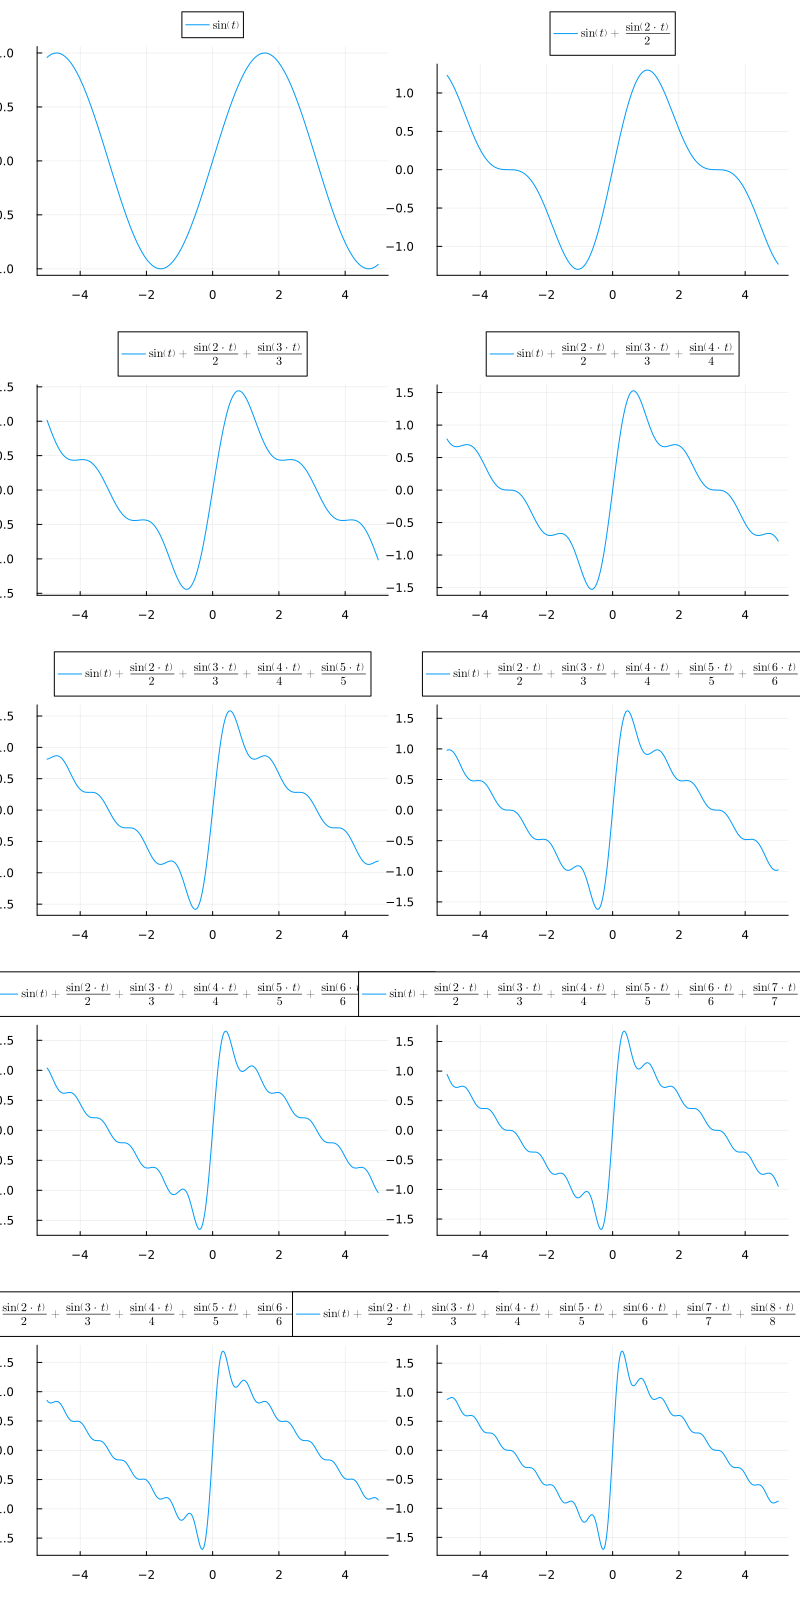

In [12]:
using Plots, SymPy, Latexify
@vars t real=true
a(t,n) = sin(n*t)/n
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, plot(i, label=latexify(i), legend=:outertop))
end
plot(plots..., layout=(5,2), size=(800,1600))

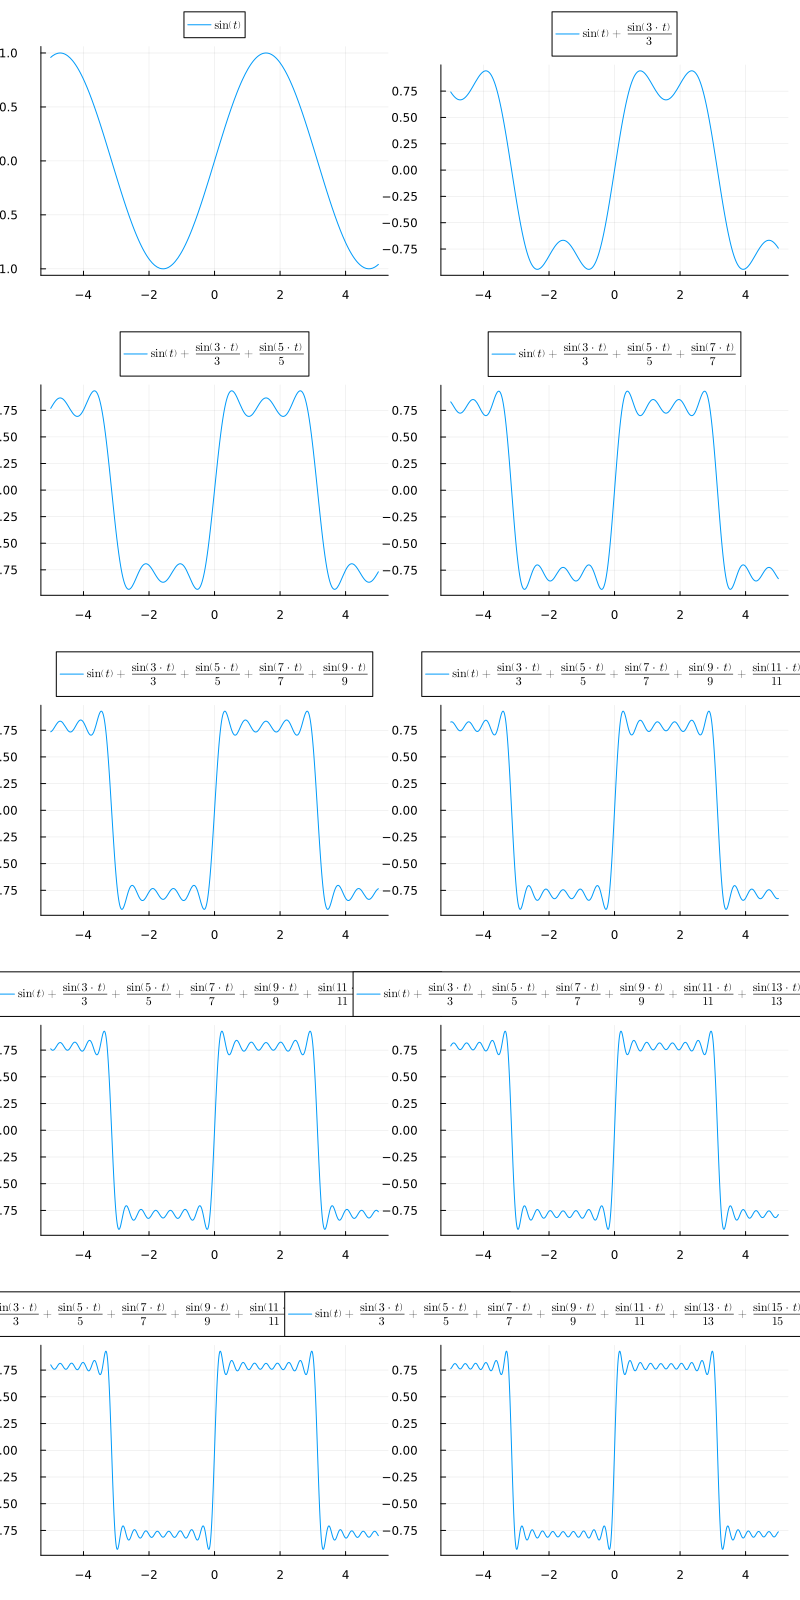

In [13]:
using Plots, SymPy, Latexify
@vars t real=true
a(t,n) = sin((2n-1)t)/(2n-1)
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, plot(i, label=latexify(i), legend=:outertop))
end
plot(plots..., layout=(5,2), size=(800,1600))

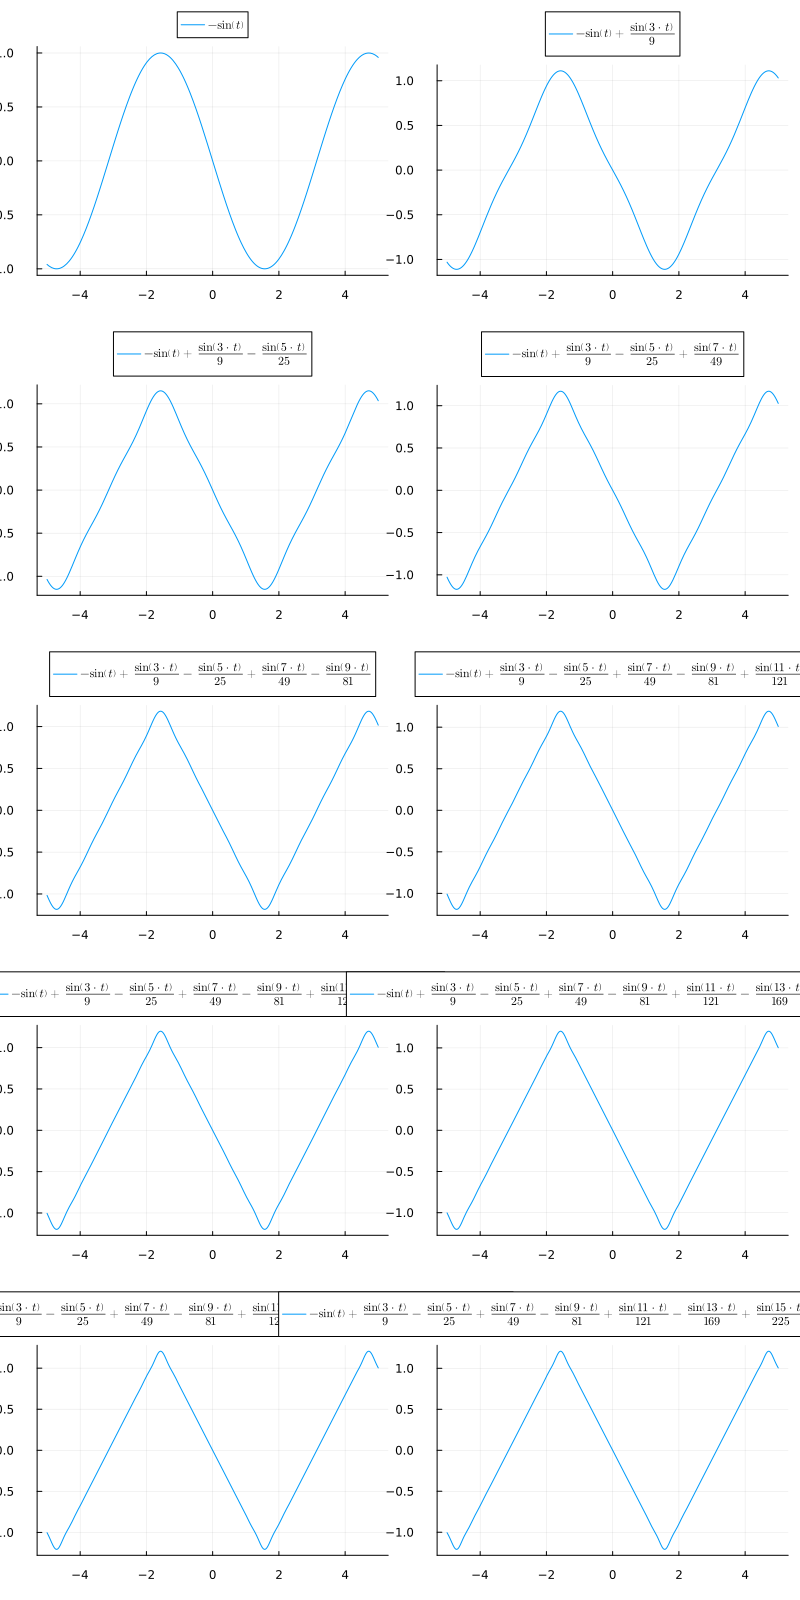

In [14]:
using Plots, SymPy, Latexify
@vars t real=true
a(t,n) = (-1)^n*sin((2n-1)t)/(2n-1)^2
N = 10
an = [a(t,n) for n=1:N]
An = cumsum(an)
plots = []  # Array para guardar las gráficas
for i in An
    push!(plots, plot(i, label=latexify(i), legend=:outertop))
end
plot(plots..., layout=(5,2), size=(800,1600))